# Regresión Logística para Predicciones Bancarias

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
# Cargar datos (en este caso el separador es ;)
data = pd.read_csv("../../ReposCurso/python-ml-course/datasets/bank/bank.csv", sep=";")

In [60]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [61]:
data.shape

(4119, 21)

In [62]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [63]:
# Convertimos la última columna (y) a integer, para que nos devuelva 0 o 1, en lugar de "y" y "n".
data["y"] = (data["y"]=="yes").astype(int)

In [64]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,0


In [65]:
# Del campo 'education', extraemos los unique, para saber los tipos de educación que hay.
data["education"].unique()

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [66]:
# Transformamos los niveles basic.4y, basic.6y y basic.9y a solo 'Basic', para disminuir categorías.
data["education"] = np.where(data["education"]=="basic.4y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.6y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.9y", "Basic", data["education"])

# Arreglamos los demás campos para que se vean mejor
data["education"] = np.where(data["education"]=="high.school", "High School", data["education"])
data["education"] = np.where(data["education"]=="professional.course", "Professional Course", data["education"])
data["education"] = np.where(data["education"]=="university.degree", "University Degree", data["education"])

data["education"] = np.where(data["education"]=="illiterate", "Illiterate", data["education"])
data["education"] = np.where(data["education"]=="unknown", "Unknown", data["education"])

In [67]:
data["education"].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'Unknown', 'Illiterate'], dtype=object)

In [68]:
# Para ver cuantas personas compraron el producto(1) o no lo compraron(0)
data["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [69]:
# Obtenemos el promedio de los campos, agrupados por si compraron o no compraron
data.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
0,39.895311,219.40976,2.605780,982.763086,0.141767,0.240185,93.599677,-40.586723,3.802826,5175.502072
1,41.889135,560.78714,1.980044,778.722838,0.585366,-1.177384,93.417268,-39.786475,2.145448,5093.118625


In [70]:
# Agrupamos por 'education', para tener una mirada previa de los datos
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
Unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


### Frecuencia de Compra en funcion del Nivel de Educación

Text(0, 0.5, 'Frecuencia de Compra del Producto')

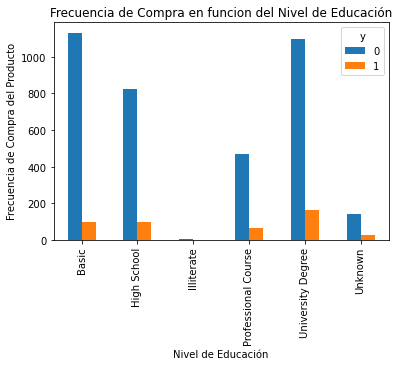

In [71]:
%matplotlib inline
pd.crosstab(data.education, data.y).plot(kind="bar")
plt.title("Frecuencia de Compra en funcion del Nivel de Educación")
plt.xlabel("Nivel de Educación")
plt.ylabel("Frecuencia de Compra del Producto")

Al parecer, quienes más compran son universitarios, pero tampoco hay una tendencia muy clara al respecto

### Frecuencia de Compras de acuerdo al Estado Civil

Text(0, 0.5, 'Proporción de Clientes')

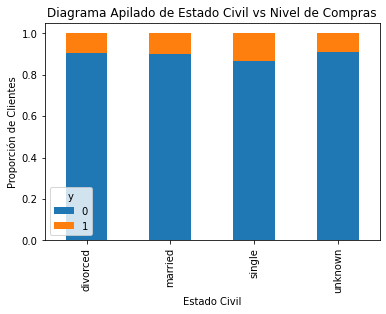

In [72]:
# Cruzamos tablas
table = pd.crosstab(data.marital, data.y)

# Le agregamos div(table.sum(1).astype(float), axis=0). para proporcionar los datos (Hacr prueba quitando esa parte)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Diagrama Apilado de Estado Civil vs Nivel de Compras")
plt.xlabel("Estado Civil")
plt.ylabel("Proporción de Clientes")

Al parecer el Estado Civil de la persona, no tiene relación con la cantidad de compras.

### Frecuencia de compras por día de Semana

Text(0, 0.5, 'Frecuencia de Compra del Producto')

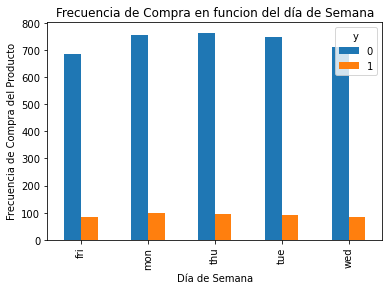

In [73]:
%matplotlib inline
pd.crosstab(data.day_of_week, data.y).plot(kind="bar")
plt.title("Frecuencia de Compra en funcion del día de Semana")
plt.xlabel("Día de Semana")
plt.ylabel("Frecuencia de Compra del Producto")

Text(0, 0.5, 'Proporción de Clientes')

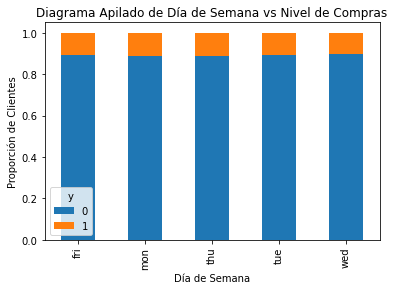

In [74]:
# Si lo transformamos en apilado
table = pd.crosstab(data.day_of_week, data.y)

# Le agregamos div(table.sum(1).astype(float), axis=0). para proporcionar los datos (Hacr prueba quitando esa parte)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Diagrama Apilado de Día de Semana vs Nivel de Compras")
plt.xlabel("Día de Semana")
plt.ylabel("Proporción de Clientes")

Tampoco hay una clara tendencia de que un día en específico se compre más o menos

Text(0, 0.5, 'Frecuencia de Compra del Producto')

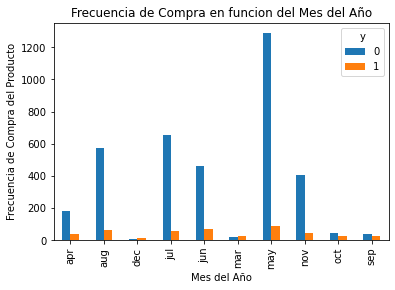

In [75]:
### Frecuencia de compras por mes del año
%matplotlib inline
pd.crosstab(data.month, data.y).plot(kind="bar")
plt.title("Frecuencia de Compra en funcion del Mes del Año")
plt.xlabel("Mes del Año")
plt.ylabel("Frecuencia de Compra del Producto")

Text(0, 0.5, 'Proporción de Clientes')

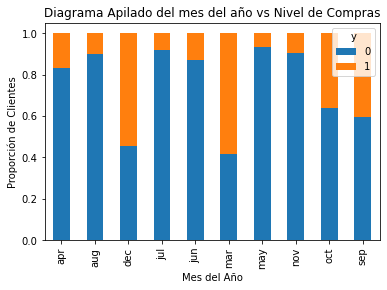

In [76]:
# Si lo transformamos en apilado
table = pd.crosstab(data.month, data.y)

# Le agregamos div(table.sum(1).astype(float), axis=0). para proporcionar los datos (Hacr prueba quitando esa parte)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Diagrama Apilado del mes del año vs Nivel de Compras")
plt.xlabel("Mes del Año")
plt.ylabel("Proporción de Clientes")

Se ve una tendencia orientada a que en dec y mar, se compra más y que en may, nov y jul es cuando más se rechaza la compra

Text(0, 0.5, 'Cliente')

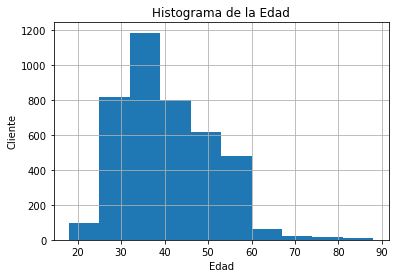

In [77]:
# Si hacemos un cruce con la columna de la edad
%matplotlib inline
data.age.hist()
plt.title("Histograma de la Edad")
plt.xlabel("Edad")
plt.ylabel("Cliente")

<AxesSubplot:xlabel='age'>

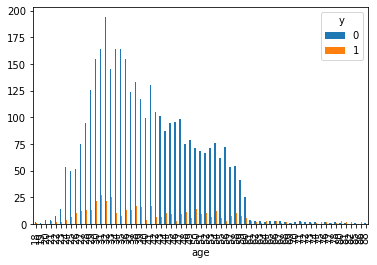

In [78]:
pd.crosstab(data.age, data.y).plot(kind="bar")

Se observa que las personas de < 25 años y > 60, no tienen interés en comprar el producto

<AxesSubplot:xlabel='poutcome'>

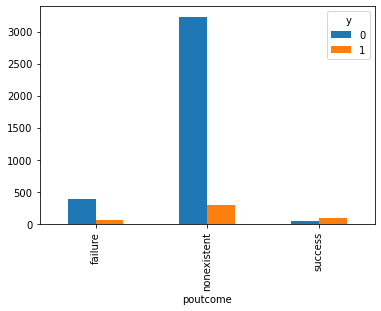

In [79]:
# Cruce con tabla que indica si la compra pasada fue exitosa, fallida o no han comprado antes
pd.crosstab(data.poutcome, data.y).plot(kind="bar")


La tendencia es que 
* Si no han comprado antes, es más probable que no compren esta vez.
* Las personas que compraron y tuvieron mala experiencia, es más probable que no vuelvan a comprar.
* Las personas que compraron y tuvieron buena experiencoa, es más probable que vuelvan a comprar.

### Conversión de las Variables Categóricas a Dummies

In [80]:
categories = ["job", "marital", "education", "housing", "loan", "contact",
              "month", "day_of_week", "poutcome"]

# Haremos que cada uno de los datos del dataset, sea una categoría
for category in categories:
    cat_list = "cat" + "_" + category
    cat_dummies = pd.get_dummies(data[category], prefix=category)
    data_new = data.join(cat_dummies)
    data = data_new

In [56]:
data.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_d

In [105]:
# Eliminaresmos las columnas que no necesitaremos (columnas originales)
data_vars = data.columns.values.tolist()

In [106]:
# Para separar las columnas a eliminar
to_keep = [v for v in data_vars if v not in categories and v != "default"] 
# Quita todas las columnas que estan en Categories, incluso Default, porque causa problemas esa columna

In [107]:
# Se eliminaron las columnas originales desde las cuales se crearon las dummies
bank_data = data[to_keep]
bank_data.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_High School',
       'education_Illiterate', 'education_Professional Course',
       'education_University Degree', 'education_Unknown', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'd

In [132]:
bank_data_vars = bank_data.columns.values.tolist()
Y = ["y"]
X = [v for v in bank_data_vars if v not in Y]

### Seleccion de Rasgos del Modelo

In [133]:
# Añadiremos 12 variables predictoras (pueden ser mas o menos)
n = 12

In [134]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [135]:
lr = LogisticRegression(solver = "lbfgs", max_iter = 5000) 
# Hubo que ponerle un max de iteraciones porque tiraba error

In [136]:
rfe = RFE(lr, n)
rfe = rfe.fit(bank_data[X], bank_data[Y].values.ravel())   # X = Variable predictora / Y = Variable a predecir

/Users/camilo.ortega/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=12 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [137]:
# Para saber qué columnas elegirá para hacer la predicción
print(rfe.support_)

[False False False False  True False False False  True False False False
 False False False  True False False  True False  True False False False
 False False False False False False False False False False False False
 False False False False False False  True  True  True  True  True False
 False False False False False False False  True False  True]


In [138]:
# Podemos ver en ranking, las mejores columnas ( = 1)
print(rfe.ranking_)

[44 43 19 47  1 21 27 24  1 36  3 13 11 40 12  1 10 34  1  2  1 39 18 32
 35 45 42 15 38 20 25  6  7 17 46 16 22 26  8  4 37 23  1  1  1  1  1 14
 33  5 31 28 30 29  9  1 41  1]


In [139]:
# Y para listar las columnas que usará (= true)
z = zip(bank_data_vars, rfe.support_, rfe.ranking_)
list(z)

[('age', False, 44),
 ('duration', False, 43),
 ('campaign', False, 19),
 ('pdays', False, 47),
 ('previous', True, 1),
 ('emp.var.rate', False, 21),
 ('cons.price.idx', False, 27),
 ('cons.conf.idx', False, 24),
 ('euribor3m', True, 1),
 ('nr.employed', False, 36),
 ('y', False, 3),
 ('job_admin.', False, 13),
 ('job_blue-collar', False, 11),
 ('job_entrepreneur', False, 40),
 ('job_housemaid', False, 12),
 ('job_management', True, 1),
 ('job_retired', False, 10),
 ('job_self-employed', False, 34),
 ('job_services', True, 1),
 ('job_student', False, 2),
 ('job_technician', True, 1),
 ('job_unemployed', False, 39),
 ('job_unknown', False, 18),
 ('marital_divorced', False, 32),
 ('marital_married', False, 35),
 ('marital_single', False, 45),
 ('marital_unknown', False, 42),
 ('education_Basic', False, 15),
 ('education_High School', False, 38),
 ('education_Illiterate', False, 20),
 ('education_Professional Course', False, 25),
 ('education_University Degree', False, 6),
 ('education_Un

In [142]:
# Crearemos el dataset con las columnas definitivas
cols = ["previous", "euribor3m", "job_management", "job_services", "job_technician", "month_aug", "month_dec", 
        "month_jul", "month_jun", "month_mar", "day_of_week_wed", "poutcome_nonexistent"]

In [144]:
X = bank_data[cols]
Y = bank_data["y"]   ## Cuantas personas comprarán el producto(?)

### Implementación del Modelo en Pyhton con statsmodel.api

In [147]:
import statsmodels.api as sm

In [148]:
logit_model = sm.Logit(Y, X)

In [149]:
result = logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.293262
         Iterations 7


In [151]:
result.summary2() ## El summary1 no funciona

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.151     
Dependent Variable:   y                 AIC:               2439.8885 
Date:                 2022-06-07 12:59  BIC:               2515.7689 
No. Observations:     4119              Log-Likelihood:    -1207.9   
Df Model:             11                LL-Null:           -1422.9   
Df Residuals:         4107              LLR p-value:       2.6460e-85
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                      Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
previous             -0.0928   0.0698  -1.3295 0.1837 -0.2296  0.0440
euribor3m            -0.6025   0.0369 -16.3311 0.0000 -0.6748 -0.5302
job_management       -0.3133   0.2170  -1.4437 0.1488 -0.7387  0.1120
job_services         -0.3930   0.1976  -1.9889 0.0467 -0.7803 -0.0057
job_technician        0.0097   0.1459   0.0662 0.9472 -0.2763  0.2956
month_aug             0.6240   0.1690   3.6931 0.0002  0.2929  0.9552
month_dec             1.1681   0.4462   2.6178 0.0088  0.2935  2.0426
month_jul             0.9812   0.1830   5.3608 0.0000  0.6225  1.3400
month_jun             1.0405   0.1692   6.1511 0.0000  0.7090  1.3721
month_mar             1.6094   0.3140   5.1263 0.0000  0.9941  2.2247
day_of_week_wed      -0.0808   0.1382  -0.5847 0.5588 -0.3518  0.1901
poutcome_nonexistent -0.7587   0.1227  -6.1815 0.0000 -0.9992 -0.5181
=====================================================================

"""

Mientras más alto sea el Pvalor, menor será la significancia de la variable (menos nos va a servir)

### Implementacion del Modelo en Python con scikit-learn

In [152]:
from sklearn import linear_model

In [154]:
logit_model = linear_model.LogisticRegression()
logit_model.fit(X,Y)

LogisticRegression()

In [155]:
logit_model.score(X,Y) ## Factor de R^2

0.8970623937848993

Entonces el valor de nuestro modelo es bastante alto, porque le acertaríamos al 89.7% de los casos

In [156]:
Y.mean()

0.10949259529011895

Por lo tanto, si tenemos que: 
   * Y = 0, no compra
   * Y = 1, compra
    
Con 0.109 significa que el 10.9% de la gente compraría   

In [158]:
1 - Y.mean()

0.8905074047098811

Sin hacer modelo, acertaríamos al 89.05% de los casos, en cambio con nuestro modelo acertamos al 89.7% de los casos.

In [162]:
# Para sacar el nombre y el coeficiente de cada variable de nuestro modelo.
pd.DataFrame(list(zip(X.columns, np.transpose(logit_model.coef_))))

,0,1
0,previous,[0.5683509333417296]
1,euribor3m,[-0.5405999615062023]
2,job_management,[-0.27834020004113963]
3,job_services,[-0.23126042571153685]
4,job_technician,[0.1268832756747381]
5,month_aug,[0.6139476325390719]
6,month_dec,[1.2236622803152521]
7,month_jul,[0.8899293597303719]
8,month_jun,[0.9955731451138503]
9,month_mar,[1.5914374631673387]


Por ejemplo:
 * Cada vez que el valor de euribor3m sube 1 punto, su coeficiente de probabilidades baja 0.5.
 * Cada vez que el valor de job_services sube 1 punto, su coeficiente de probabilidad baja 0.23, por lo tanto no conviene contactar a ese tipo de personas para que compren.
 * Cada vez que month_mar sube 1 punto, o se contacta a una persona en marzo, la probabilidad de que compre, aumenta 1.59.
 * etc.

## Validación del Modelo Logístico

In [180]:
# Dividiremos en conjunto de testing y conjunto de entrenamiento
from sklearn.model_selection import train_test_split
from IPython.display import display, Math, Latex

In [181]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)
# random_state = Semilla de división (aleatoria si es 0)

In [182]:
# Volvemos a crear un modelo lineal, pero solo para el conjunto de testing
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

LogisticRegression()

In [185]:
display(Math(r'Y_p=\begin{cases}0& si\ p\leq0.5\\1&si\ p>0.5\end{cases}'))

<IPython.core.display.Math object>

In [183]:
probs = lm.predict_proba(X_test)

In [177]:
probs
# Primera columna es probabilidad, o sea, qué tan seguro estoy de lo que estoy diciendo.
# La segunda es el valor de salida: Si es > 0.5 = Compra, si es < 0.5 = No compra

array([[0.93497332, 0.06502668],
       [0.8641683 , 0.1358317 ],
       [0.93168848, 0.06831152],
       ...,
       [0.68514319, 0.31485681],
       [0.96933313, 0.03066687],
       [0.55222945, 0.44777055]])

In [178]:
prediction = lm.predict(X_test)

In [179]:
prediction

array([0, 0, 0, ..., 0, 0, 0])

Los 3 primeros valores de probs(0.06, 0.13, 0.06) son < a 0.5, por eso 'prediction' los marca con 0, al igual que los 3 últimos.

In [189]:
display(Math(r'\varepsilon\in (0,1), Y_p=\begin{cases}0& si\ p\leq\varepsilon\\1&si\ p>\varepsilon\end{cases}'))

<IPython.core.display.Math object>

In [195]:
# Usaremos sólo la primera columna
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0] > threshold, 1, 0)
prob_df.head()
# Si prob_df en mi columna (0) es mayor que 0.1, será una compra(1), sino, será 0.

,0,prediction
0,0.065027,0
1,0.135832,1
2,0.068312,0
3,0.060863,0
4,0.040510,0


In [196]:
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,846
1,390


In [197]:
# Por lo tanto 390 usuarios comprarían el producto y 846 no comprarían
390/len(prob_df)*100


31.55339805825243

31.5% compraría

In [200]:
# Si modificamos el threshold:
threshold = 0.05
prob_df["prediction"] = np.where(prob_df[0] > threshold, 1, 0)
pd.crosstab(prob_df.prediction, columns="count")

col_0,count
prediction,
0,501
1,735


Vemos que aumentamos la cantidad de compradores

In [201]:
from sklearn import metrics

In [202]:
metrics.accuracy_score(Y_test, prediction)

0.901294498381877

Ahora con división de conjunto de entrenamiento y testing, subimos efectividad a 90%

## Validación Cruzada

Elegir K particiones y cada una se utilizará una vez para testing. Para cada iteración se medirá la eficacia del modelo y luego se medirá la eficacia del modelo como la media de cada una de las eficacias (Buscar la definicion en Google).

In [216]:
from sklearn.model_selection import cross_val_score

In [217]:
# Para un K de 10 divisiones (cv)
scores = cross_val_score(linear_model.LogisticRegression(), X, Y, scoring ="accuracy", cv=10) 

In [218]:
scores

array([0.90533981, 0.88592233, 0.90533981, 0.88592233, 0.90048544,
       0.90048544, 0.88349515, 0.89320388, 0.89563107, 0.89294404])

In [219]:
scores.mean()

0.8948769281647888

Por lo tanto la eficacia del modelo es del 89.4%, así el modelo generaliza bastante bien.

## Matrices de Confusión y Curvas ROC

In [222]:
# Recuperaremos los datos usados antes para dividir en entrenamiento y testing
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

In [224]:
# Creamos el modelo lineal con regresion logistica
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)

LogisticRegression()

In [225]:
# Para predecir las probabilidades del conjunto que hemos creado
probs = lm.predict_proba(X_test)

In [230]:
# Selecciono solo la columna 1
prob = probs[:,1]
# Genero un Dataframe de esa columna
prob_df = pd.DataFrame(prob)
# Creamos un threshold
threshold = 0.1
# Si prob_df en mi columna (0) es mayor que 0.1, será una compra(1), sino, será 0.
prob_df["prediction"] = np.where(prob_df[0]>=threshold, 1, 0)
# Agregamos igual la Y del conjunto de testing
prob_df["actual"] = list(Y_test)
prob_df

,0,prediction,actual
0,0.065027,0,0
1,0.135832,1,0
2,0.068312,0,0
3,0.060863,0,0
4,0.040510,0,0
...,...,...,...
1231,0.060863,0,0
1232,0.060801,0,0
1233,0.314857,1,0
1234,0.030667,0,0


In [233]:
# Creamos una matriz para ver los datos:
confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)

In [234]:
confusion_matrix

actual,0,1
prediction,,
0,806,40
1,308,82


Por lo tanto para un threshold de 0.1:
 * Verdaderos Negativos (TN) de = 806
 * Falsos Positivos (FP) = 308
 * Falsos Negativos (FN) = 40
 * Verdaderos Positivos (TP) = 82

In [255]:
TN = confusion_matrix[0][0]
FP = confusion_matrix[0][1]
FN = confusion_matrix[1][0]
TP = confusion_matrix[1][1]

In [256]:
# Para calcular sensibilidad
sens = TP / (TP + FN)
sens

0.38524590163934425

In [257]:
# Para calcular 1 - especificidad
espc_1 = 1 - TN / (TN+FP)
espc_1 

0.07091561938958713

In [273]:
# Calculamos para varios thresholds, creando una matriz de thresholds.
thresholds = [0.04, 0.05, 0.07, 0.10, 0.12, 0.15, 0.18, 0.20, 0.25]

# Valores de entrada
sensitivities = [1]
especifities_1 = [1]

for t in thresholds:
    # Si prob_df en mi columna (0) es mayor que 0.1, será una compra(1), sino, será 0.
    prob_df["prediction"] = np.where(prob_df[0]>=t, 1, 0)
    # Agregamos igual la Y del conjunto de testing
    prob_df["actual"] = list(Y_test)
    prob_df

    confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
    TN = confusion_matrix[0][0]
    FP = confusion_matrix[0][1]
    FN = confusion_matrix[1][0]
    TP = confusion_matrix[1][1]

    # Para calcular sensibilidad
    sens = TP / (TP + FN)
    sensitivities.append(sens)

    # Para calcular 1 - especificidad
    espc_1 = 1 - TN / (TN+FP)
    especifities_1.append(espc_1)
    
sensitivities.append(0)
especifities_1.append(0) 

In [274]:
# Vemos las sensibilidades
sensitivities

[1,
 0.9426229508196722,
 0.819672131147541,
 0.680327868852459,
 0.6721311475409836,
 0.6475409836065574,
 0.6311475409836066,
 0.5245901639344263,
 0.4672131147540984,
 0.38524590163934425,
 0]

In [275]:
# Vemos las especifidades
especifities_1

[1,
 0.7459605026929982,
 0.5700179533213645,
 0.2899461400359067,
 0.2764811490125674,
 0.2585278276481149,
 0.23698384201077194,
 0.13734290843806107,
 0.1140035906642729,
 0.07091561938958713,
 0]

In [276]:
# Crearemos la curva plot
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Curva ROC')

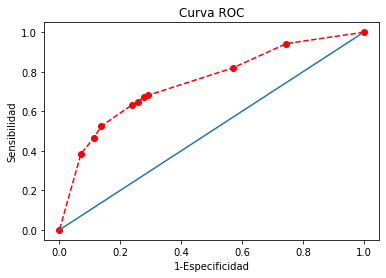

In [281]:
%matplotlib inline
plt.plot(especifities_1, sensitivities, marker="o", linestyle="--", color="r")
x = [i*0.01 for i in range(100)]
y = [i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel("1-Especificidad")
plt.ylabel("Sensibilidad")
plt.title("Curva ROC")

La predicción para que sea buena, debe tener la curva sobre la diagonal. 
* Mientras más grande el área bajo la curva, mejor es el modelo.
* En el mejor de los casos debiese tener una recta vertical en [0,0] y una horizontal en [1,1] -> Area = 1
* En el peor de los casos, el área bajo la curva, será 0.

In [282]:
# Para calcular el área bajo la curva:
from sklearn import metrics
from ggplot import *

In [284]:
# Hay un tercer valor que no usaremos, así que queda como '_'
espc_1, sensit, _ = metrics.roc_curve(Y_test, prob)

In [287]:
# Crearemos un diccionario donde aparecerá como 'x' la espc_1 y como 'y' la sensit.
df = pd.DataFrame (
{
    "x":espc_1,
    "y":sensit
}
 )

In [288]:
df.head()

,x,y
0,0.000000,0.000000
1,0.000000,0.008197
2,0.000000,0.032787
3,0.001795,0.032787
4,0.001795,0.049180


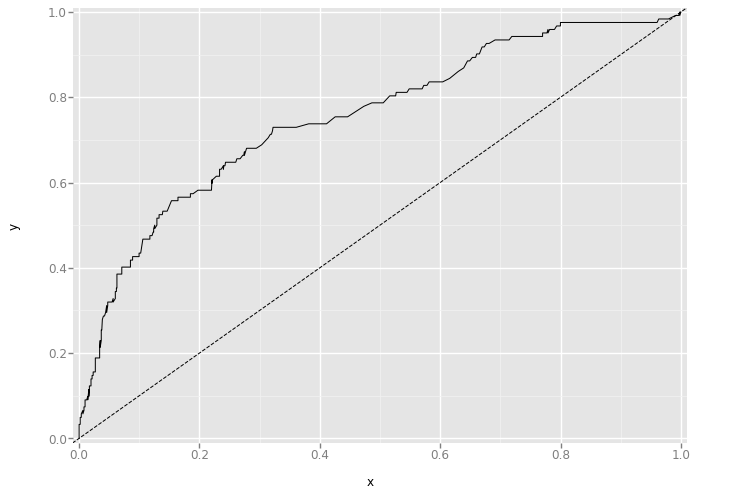

<ggplot: (8761083197365)>

In [299]:
ggplot(df, aes(x="x", y="y")) + geom_line() + geom_abline(linetype="dashed") + xlim(-0.01, 1.01) + ylim(-0.01, 1.01)

#### NOTA: Revisar la libreria de ggplot

In [300]:
# Calcular área bajo la curva
auc = metrics.auc(espc_1, sensit)
auc

0.7538813020572741

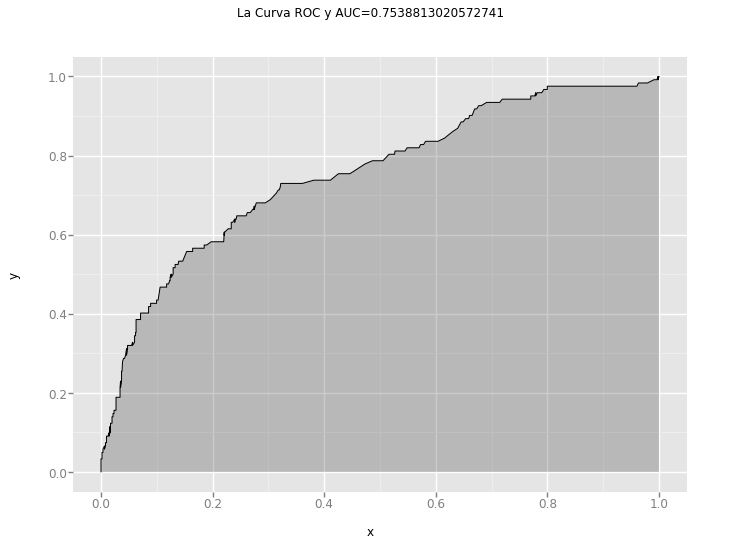

<ggplot: (8761083185405)>

In [301]:
# Resaltaremos el área bajo la curva
ggplot(df, aes(x="x", y="y")) + geom_area(alpha=0.25) + geom_line(aes(y="y")) + ggtitle ("La Curva ROC y AUC=%s" % str(auc))